## Estimating regression fits

seaborn regression plot  
- EDA 중 데이터 집합의 패턴 강조에 도움이 될 만한 시각적 가이드 제공을 위함  
- 통계를 위한 툴이 아님(∴ 측정값이 필요하면 통계 모델 따로 쓸 것)  

## Functions for drawing linear regression models
`regplot()` 또는 `lmplot()`를 사용해 회귀선 구현  
1. scatterplot x, y
2. fit reg model y ~ x
3. draw reg line & 95% confidence interval

In [7]:
import seaborn as sns
import numpy as np

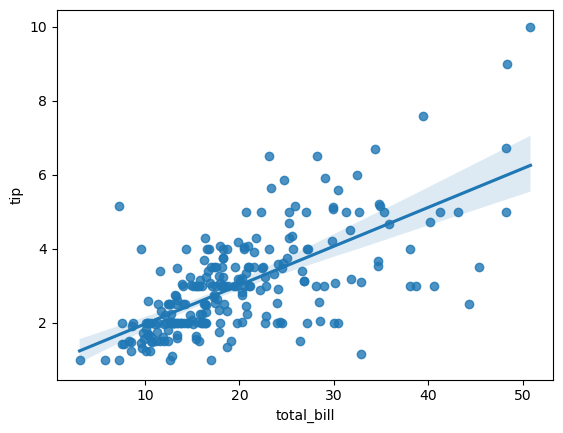

In [2]:
tips = sns.load_dataset("tips")
sns.regplot(x="total_bill", y="tip", data=tips);

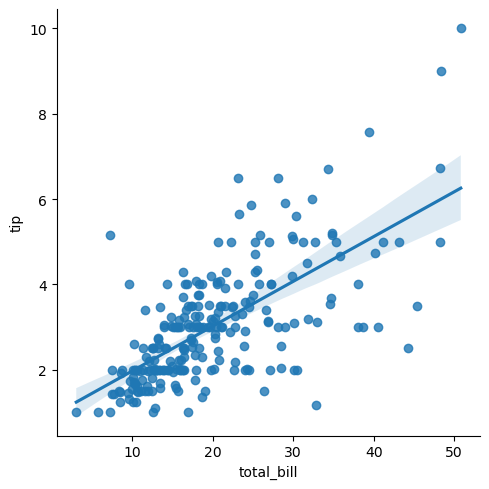

In [3]:
sns.lmplot(x="total_bill", y="tip", data=tips);

차이
`regplot()`  
- 축 수준 함수
- 간단한 numpy 배열, pandas.Series 객체 또는 데이터로 전달된 pandas.DataFrame 객체의 변수에 대한 참조를 포함하여 다양한 형식의 x 및 y 변수 받음

`lmplot()`  
- 그림 수준 함수
- 데이터를 필수 매개변수로 사용하며 x 및 y 변수는 문자열로 지정해야 함
- hue 매개변수 있음

하지만 핵심 기능은 비슷함(이 튜토리얼에서는 lmplot() 중심)
변수 중 하나가 불연속 값을 취하는 경우 선형 회귀를 맞출 수 있지만, 이러한 종류의 데이터 집합에서 생성되는 단순 산점도는 최적이 아닌 경우가 많습니다:


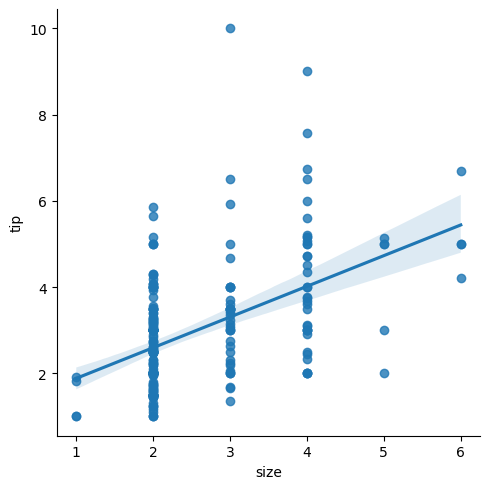

In [4]:
sns.lmplot(x="size", y="tip", data=tips);

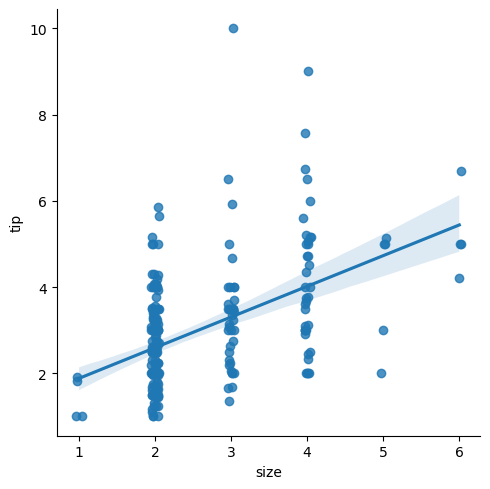

In [5]:
# 1. 불연속형 값에 임의의 노이즈('지터')를 추가하여 해당 값의 분포를 더 명확하게 만드는 방법
#지터는 분산형 차트 데이터에만 적용되며 회귀선 적합도 자체에는 영향을 미치지 않습니다:

sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);


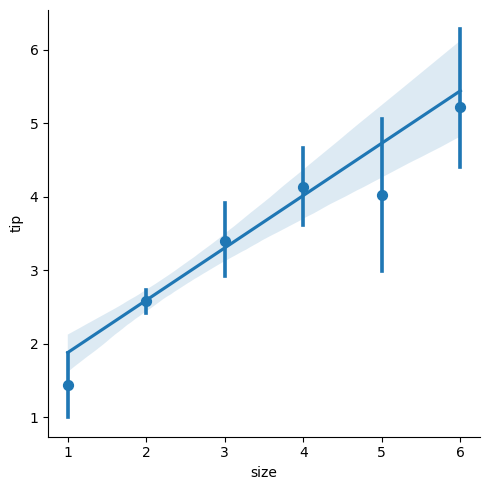

In [8]:
# 2. 각 불연속형 구간차원의 관측값을 축소하여 신뢰 구간과 함께 중심 경향의 추정치 플롯
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);